# 과제
아래 가이드에 따라 고객별 연간 구매데이터를 생성하고 아래사항을 수행하기(관측치 1,000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

거래 번호
- id : 1 ~ 1000번 일련번호 - 개시 후 1천 건의 거래가 있었고 거기에 넘버링한 거라고 이해해보자

고객별 속성 데이터
- cusno : 고객번호 1000개 랜덤(1,000명의 고객데이터가 있는 것)
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- (date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성)
- (day : 요일)
- (time_20 : 01 ~ 24 사이 정수 난수 생성)
- (time_21 : 01 ~ 24 사이 정수 난수 생성)
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0



1. 세부 분류코드 작성:
    - 고가제품: 
    - 중가제품:  
    - 저가제품: 영화/도서, 식자재, 
2. 분류코드별 가격 다시 책정
3. 21-20년도 총 구매 가격 차이 변수 만들기

## 1. 랜덤 데이터 생성

In [31]:
import pandas as pd
import numpy as np
import random
from datetime import datetime 
import time

### 고객 속성 데이터프레임 만들기

In [32]:
random.seed(1)

#고객별 속성 데이터프레임 만들기

cusno=np.arange(1001,2001)
#cusno=random.sample(list(range(1000,9000)),1000)
gender=np.random.choice([0,1],size=1000)
age=np.random.randint(10,81,size=1000)
region=np.random.randint(1,11,size=1000)

In [33]:
cusno=pd.Series(cusno)
gender=pd.Series(gender)
age=pd.Series(age)
region=pd.Series(region)

#시리즈 합쳐서 데이터프레임 만들기
customer=pd.concat([cusno,gender,age,region],axis=1)

#컬럼명 지정
customer.columns=['cusno','gender','age','region']

customer.head()

,cusno,gender,age,region
0,1001,1,78,10
1,1002,0,14,8
2,1003,1,53,4
3,1004,1,66,3
4,1005,0,61,3


### 거래 데이터프레임 만들기

In [34]:
#빈 데이터프레임 만들기
purchase=pd.DataFrame(columns=['id','cusno','product','price','quantity','amount'])

In [35]:
#기본거래 데이터 만들기

#1. 거래 id 만들기
id=random.sample(list(range(10000,50000)),10000)

#2. 중복 cusno 만들기
cusno=np.random.randint(1001,2001,size=10000)   #기존 cusno가 중복될 수 있도록 만들기

#3. 기본거래 데이터 만들기
#product=np.random.choice([10,20,30],size=10000)
product=[random.randrange(10,40,10) for i in range(10000)]
price=np.random.uniform(1000,50000,size=10000).round(2)
quantity=np.random.randint(1,100,size=10000)
amount=price*quantity

In [36]:
#데이터프레임 채우기

purchase['id']=id
purchase['cusno']=cusno
purchase['product']=product
purchase['price']=price
purchase['quantity']=quantity
purchase['amount']=amount


purchase.head()

,id,cusno,product,price,quantity,amount
0,18805,1989,30,30413.89,5,152069.45
1,47303,1912,10,44580.42,20,891608.40
2,14135,1190,20,47218.25,3,141654.75
3,26716,1137,10,11635.14,61,709743.54
4,17727,1254,30,11618.10,70,813267.00


In [37]:
#날짜거래 데이터프레임 만들기

#1.date 
date_list=list(pd.date_range('2020-01-01','2021-12-31',freq='D')) #랜덤 선택을 위한 date 리스트

purchase['date']=np.random.choice(date_list,size=10000)

#2. day(요일) 
purchase['day']=purchase['date'].apply(lambda x: x.weekday())  #date별 요일을 숫자로 나타냄
purchase['day']=purchase['day'].replace(list(range(7)),['월','화','수','목','금','토','일'])

#3. 시간
purchase['time']=np.random.randint(1,25,size=10000)


purchase.head(10)

,id,cusno,product,price,quantity,amount,date,day,time
0,18805,1989,30,30413.89,5,152069.45,2020-02-08,토,5
1,47303,1912,10,44580.42,20,891608.40,2020-09-10,목,15
2,14135,1190,20,47218.25,3,141654.75,2020-07-01,수,13
3,26716,1137,10,11635.14,61,709743.54,2021-07-10,토,15
4,17727,1254,30,11618.10,70,813267.00,2020-02-25,화,14
5,42468,1577,20,3133.44,37,115937.28,2021-11-01,월,7
6,39457,1836,20,28884.24,13,375495.12,2021-05-12,수,22
7,40949,1698,10,38879.75,89,3460297.75,2021-12-09,목,8
8,34878,1269,10,26959.04,12,323508.48,2021-05-25,화,4
9,23759,1669,10,39548.48,30,1186454.40,2020-03-16,월,18


In [38]:
#id 데이터 앞에 연도 표시하기

In [39]:
purchase['id']=purchase.apply(lambda x: str(x.date.year-2000)+str(x.id), axis=1)
purchase.head()

,id,cusno,product,price,quantity,amount,date,day,time
0,2018805,1989,30,30413.89,5,152069.45,2020-02-08,토,5
1,2047303,1912,10,44580.42,20,891608.40,2020-09-10,목,15
2,2014135,1190,20,47218.25,3,141654.75,2020-07-01,수,13
3,2126716,1137,10,11635.14,61,709743.54,2021-07-10,토,15
4,2017727,1254,30,11618.10,70,813267.00,2020-02-25,화,14


In [40]:
#데이터프레임 통합: 공통 변수 cusno를 활용해 데이터 결합
df=customer.merge(purchase,on='cusno',how='outer')
df.head(10)

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,1,78,10,2144968,20,46737.92,75,3505344.00,2021-05-27,목,5
1,1001,1,78,10,2122729,30,35976.88,51,1834820.88,2021-05-01,토,8
2,1001,1,78,10,2036008,10,8223.47,23,189139.81,2020-03-01,일,24
3,1001,1,78,10,2042094,30,37178.71,97,3606334.87,2020-04-26,일,9
4,1001,1,78,10,2036968,20,22875.35,94,2150282.90,2020-06-15,월,15
5,1001,1,78,10,2044723,10,3614.87,47,169898.89,2020-04-30,목,18
6,1001,1,78,10,2124063,10,28404.22,68,1931486.96,2021-01-03,일,20
7,1001,1,78,10,2037080,10,29299.83,98,2871383.34,2020-04-26,일,22
8,1001,1,78,10,2122103,10,22507.47,86,1935642.42,2021-03-16,화,17
9,1001,1,78,10,2019796,10,8248.31,87,717602.97,2020-03-13,금,19


In [41]:
df.cusno.value_counts()

1362    23
1045    20
1660    19
1346    19
1921    19
        ..
1527     3
1792     3
1348     2
1451     2
1756     1
Name: cusno, Length: 1000, dtype: int64

In [42]:
#데이터프레임에 null 값이 없는지 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   cusno     10000 non-null  int64         
 1   gender    10000 non-null  int64         
 2   age       10000 non-null  int64         
 3   region    10000 non-null  int64         
 4   id        10000 non-null  object        
 5   product   10000 non-null  int64         
 6   price     10000 non-null  float64       
 7   quantity  10000 non-null  int64         
 8   amount    10000 non-null  float64       
 9   date      10000 non-null  datetime64[ns]
 10  day       10000 non-null  object        
 11  time      10000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 1015.6+ KB


---

## 2. 데이터 전처리

In [43]:
#gender value 문자화

df['gender'].replace({0:'male',1:'female'}, inplace=True)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,female,78,10,2144968,20,46737.92,75,3505344.00,2021-05-27,목,5
1,1001,female,78,10,2122729,30,35976.88,51,1834820.88,2021-05-01,토,8
2,1001,female,78,10,2036008,10,8223.47,23,189139.81,2020-03-01,일,24
3,1001,female,78,10,2042094,30,37178.71,97,3606334.87,2020-04-26,일,9
4,1001,female,78,10,2036968,20,22875.35,94,2150282.90,2020-06-15,월,15


In [44]:
#region value 문자화

df['region'].replace({1:'서울', 
                      2:'경기',
                      3:'부산',
                      4:'강원',
                      5:'충북',
                      6:'충남',
                      7:'전남',
                      8:'전북',
                      9:'경남',
                      10:'경북',                      
                     },inplace=True)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time
0,1001,female,78,경북,2144968,20,46737.92,75,3505344.00,2021-05-27,목,5
1,1001,female,78,경북,2122729,30,35976.88,51,1834820.88,2021-05-01,토,8
2,1001,female,78,경북,2036008,10,8223.47,23,189139.81,2020-03-01,일,24
3,1001,female,78,경북,2042094,30,37178.71,97,3606334.87,2020-04-26,일,9
4,1001,female,78,경북,2036968,20,22875.35,94,2150282.90,2020-06-15,월,15


In [45]:
#age 범주화

def age_category(x):
    return (x//10)*10

df['age_c']=df['age'].apply(age_category)
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c
0,1001,female,78,경북,2144968,20,46737.92,75,3505344.00,2021-05-27,목,5,70
1,1001,female,78,경북,2122729,30,35976.88,51,1834820.88,2021-05-01,토,8,70
2,1001,female,78,경북,2036008,10,8223.47,23,189139.81,2020-03-01,일,24,70
3,1001,female,78,경북,2042094,30,37178.71,97,3606334.87,2020-04-26,일,9,70
4,1001,female,78,경북,2036968,20,22875.35,94,2150282.90,2020-06-15,월,15,70


In [46]:
y= round(np.random.uniform(1000,20001),2)

In [47]:
#제품코드에 따라 price, quantity, amount, sales 조정

#price, quantity 조정
def price_set(x):
    if x==10: 
        y= np.random.uniform(100000,200001)
    elif x==20:
        y= np.random.uniform(20000,100001)
    elif x==30: 
        y= np.random.uniform(1000,20001)
    return y

def quantity_set(x):
    if x==10: 
        z= np.random.randint(1,21)
    elif x==20:
        z= np.random.randint(1,50)
    elif x==30: 
        z= np.random.randint(1,100)
    return z

df['price']=df['product'].apply(price_set).round(2)
df['quantity']=df['product'].apply(quantity_set)


#amount 조정

df['amount']=df['price']*df['quantity']


df.head(10)

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c
0,1001,female,78,경북,2144968,20,25775.50,1,25775.50,2021-05-27,목,5,70
1,1001,female,78,경북,2122729,30,9793.50,88,861828.00,2021-05-01,토,8,70
2,1001,female,78,경북,2036008,10,186723.02,12,2240676.24,2020-03-01,일,24,70
3,1001,female,78,경북,2042094,30,8723.51,89,776392.39,2020-04-26,일,9,70
4,1001,female,78,경북,2036968,20,36123.37,21,758590.77,2020-06-15,월,15,70
5,1001,female,78,경북,2044723,10,183892.30,19,3493953.70,2020-04-30,목,18,70
6,1001,female,78,경북,2124063,10,189567.77,15,2843516.55,2021-01-03,일,20,70
7,1001,female,78,경북,2037080,10,126957.13,5,634785.65,2020-04-26,일,22,70
8,1001,female,78,경북,2122103,10,121568.68,12,1458824.16,2021-03-16,화,17,70
9,1001,female,78,경북,2019796,10,148982.38,19,2830665.22,2020-03-13,금,19,70


In [48]:
#데이터 순서를 날짜, 시간으로 정렬

df=df.sort_values(['date','time'],ignore_index=True)  #인덱스 무시
df.head()

,cusno,gender,age,region,id,product,price,quantity,amount,date,day,time,age_c
0,1095,male,35,전북,2015551,10,192726.26,20,3854525.20,2020-01-01,수,1,30
1,1854,female,68,경기,2016245,20,35884.67,47,1686579.49,2020-01-01,수,3,60
2,1578,female,54,전남,2010411,10,183726.47,14,2572170.58,2020-01-01,수,5,50
3,1523,male,50,전남,2028194,30,10821.67,12,129860.04,2020-01-01,수,6,50
4,1844,female,45,경남,2029975,30,17180.10,62,1065166.20,2020-01-01,수,6,40


In [49]:
# id 변수를 인덱스화
df.set_index('id',inplace=True)
df.head()

,cusno,gender,age,region,product,price,quantity,amount,date,day,time,age_c
id,,,,,,,,,,,,
2015551,1095,male,35,전북,10,192726.26,20,3854525.20,2020-01-01,수,1,30
2016245,1854,female,68,경기,20,35884.67,47,1686579.49,2020-01-01,수,3,60
2010411,1578,female,54,전남,10,183726.47,14,2572170.58,2020-01-01,수,5,50
2028194,1523,male,50,전남,30,10821.67,12,129860.04,2020-01-01,수,6,50
2029975,1844,female,45,경남,30,17180.10,62,1065166.20,2020-01-01,수,6,40


In [50]:
# 가중치
conditon1_20 = (df['age_c'] == 20) & (df.date.dt.year == 2020)
conditon2_20 = (df['age_c'] == 30) & (df.date.dt.year == 2020)
conditon3_20 = (df['age_c'] == 40) & (df.date.dt.year == 2020)
conditon4_20 = (df['age_c'] == 50) & (df.date.dt.year == 2020)

conditon1_21 = (df['age_c'] == 20) & (df.date.dt.year == 2021)
conditon2_21 = (df['age_c'] == 30) & (df.date.dt.year == 2021)
conditon3_21 = (df['age_c'] == 40) & (df.date.dt.year == 2021)
conditon4_21 = (df['age_c'] == 50) & (df.date.dt.year == 2021)


df.loc[conditon1_20,'amount'] = df.amount *1.41
df.loc[conditon2_20,'amount'] = df.amount *2.56
df.loc[conditon3_20,'amount'] = df.amount *2.64
df.loc[conditon4_20,'amount'] = df.amount *2.02


df.loc[conditon1_21,'amount'] = df.amount *0.9
df.loc[conditon2_21,'amount'] = df.amount *1.63
df.loc[conditon3_21,'amount'] = df.amount *1.72
df.loc[conditon4_21,'amount'] = df.amount *1.36


# df.loc[conditon1_21,'amount'] = df.loc[conditon1_20,'amount'] *0.93
# df.loc[conditon2_21,'amount'] = df.amount *0.93
# df.loc[conditon3_21,'amount'] = df.amount *0.95
# df.loc[conditon4_21,'amount'] = df.amount *0.98
# df.loc[conditon4_21,'amount'] = df.amount *1.46



In [51]:
df.loc[conditon1_20,'amount'].value_counts()

3.051513e+06    1
8.489598e+05    1
1.048879e+06    1
6.152996e+06    1
1.425328e+05    1
               ..
1.171874e+05    1
1.836266e+06    1
1.055403e+06    1
4.928522e+05    1
1.930446e+06    1
Name: amount, Length: 732, dtype: int64

In [52]:
df.loc[conditon1_21,'amount'].value_counts()

1593221.454    1
73726.848      1
1661188.464    1
2881796.967    1
801793.557     1
              ..
219600.972     1
1163946.654    1
139859.784     1
1290527.658    1
2142756.000    1
Name: amount, Length: 714, dtype: int64

## 탐색적 데이터 분석

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float64')) -> None

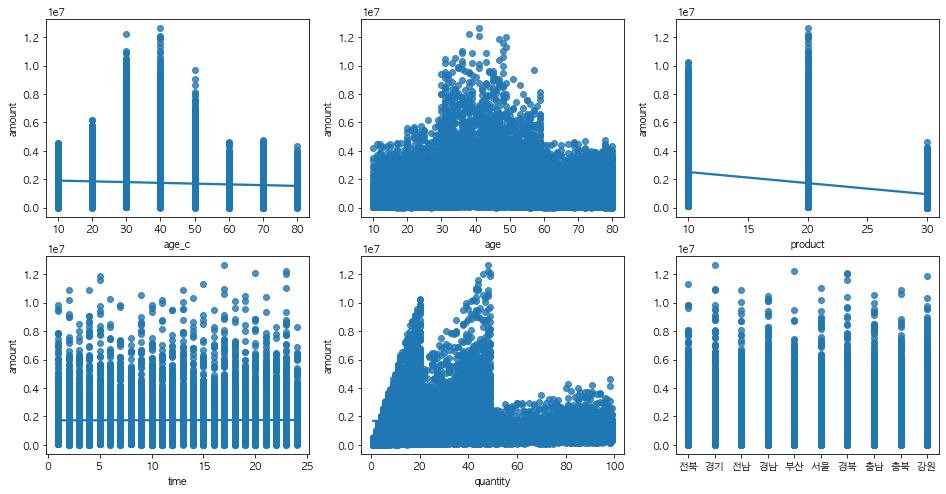

In [53]:
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc

font_path = '/Users/alexkim/cakd7/m2_분석라이브러리활용/visualization/dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family='AppleGothic')
#rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16,8))
lm_features = ['age_c','age','product','time','quantity','region']
for i , feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='amount',data=df , ax=axs[row][col])

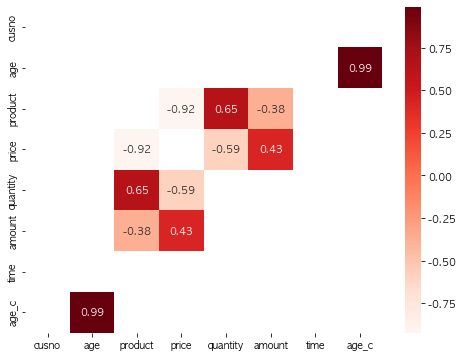

In [54]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .1) | (dfCorr <= -.1)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,6))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
# 하위 청년층들의 지출이 상위 청년층들의 합의 30%다

In [ ]:
# 상류층 들의 고가 상품 구매가 10% 증가

In [ ]:
# 남성들의 전체적인 구매력은 10% 감소

In [ ]:
# 삶의 수준이 높은 지역에서의 지출만 거의 유지되고, 나머지 지역들은 감소하는 경향

In [ ]:
# 성인 여성 평균 지출금액이 그것의 남성들에 비해 30% 높다

In [ ]:
#제품의 세부코드(1~3) 변수 추가
#고가제품 10(1:, 2:, 3:)
#중가제품 20(1:, 2:, 3:)
#저가제품 30(1:, 2:, 3:)

df['detail_20']=np.random.randint(1,4,size=10000)
df.head()

In [ ]:
#이탈 고객 변수
#df['bye_cus']=np.nan

In [ ]:
#재구매 고객 변수
#df['re_cus']=np.nan

In [ ]:
#고관여/저관여 구매 고객 여부

